In [1]:
import os
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

directory = '/data/HSC/HSC_v6/step1/g_band_sextractor/test_subset_10k'
window = '30x30'
data = []
for filename in os.listdir(directory):
    if filename.endswith(".cat"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r") as f:
            
            object_id = filename.split("_")[2]
            
            segmented_filepath = f'{directory}/test_segmented_{object_id}_step1.fits'
            img = fits.getdata(segmented_filepath)
            
            center_min = 45
            center_max = 75
            in_center = []
            
            for i in range(center_min, center_max):
                for j in range(center_min, center_max):
                    if img[i, j] not in in_center:
                        if img[i, j] != 0:
                            in_center.append(img[i, j])
            num_in_center = len(in_center)
            
            for line in f:
                if not line.startswith("#"):
                    line = line.strip().split()
                    
                    item_idx = line[0]
                    petro_rad = line[1]
                    x_pos = line[2]
                    y_pos = line[3]
                    x_min = line[4]
                    x_max = line[5]
                    y_min = line[6]
                    y_max = line[7]
                    data.append((object_id, num_in_center, item_idx, petro_rad, x_pos, y_pos, x_min, y_min, x_max, y_max))

df = pd.DataFrame(data, columns=["object_id", "NUMBER_IN_CENTER", "ITEM_INDEX", "PETRO_RADIUS", "X_IMAGE", "Y_IMAGE", "XMIN_IMAGE", "XMAX_IMAGE", "YMIN_IMAGE", "YMAX_IMAGE"])
obj_ids = np.unique(df['object_id'])

In [2]:
df

,object_id,NUMBER_IN_CENTER,ITEM_INDEX,PETRO_RADIUS,X_IMAGE,Y_IMAGE,XMIN_IMAGE,XMAX_IMAGE,YMIN_IMAGE,YMAX_IMAGE
0,69630855911341983,2,1,6.60,61.2611,59.6269,53,46,69,73
1,69630855911341983,2,2,5.94,71.8820,41.5945,61,32,82,51
2,69630855911341983,2,3,7.26,98.8966,8.6738,95,5,102,13
3,69630855911341983,2,4,10.56,62.4251,111.3798,61,110,64,113
4,69630855911341983,2,5,5.94,91.6593,115.5277,86,111,96,119
...,...,...,...,...,...,...,...,...,...,...
40115,70364500749976529,2,2,10.56,42.2756,36.2269,39,33,46,39
40116,70364500749976529,2,3,10.56,61.3630,83.6732,59,82,64,85
40117,70364500749976529,2,4,8.58,60.2286,61.1407,53,51,67,68
40118,70364500749976529,2,5,8.58,108.8873,88.2775,105,79,113,95


test_segmented_69582052197928477_step1.fits


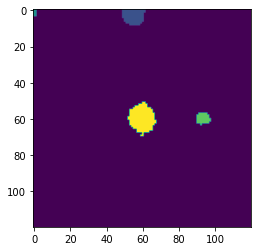

test_segmented_41558120735966224_step1.fits


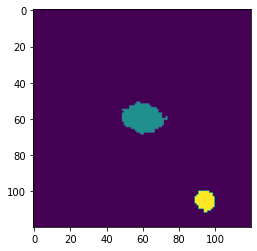

test_segmented_42714252917608555_step1.fits


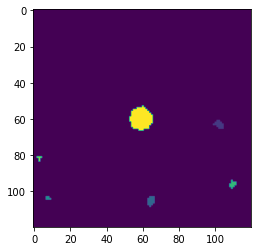

test_segmented_69613388279317170_step1.fits


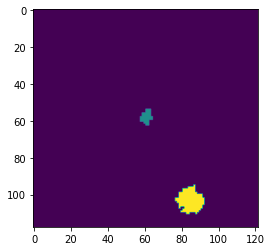

test_segmented_40154748761951110_step1.fits


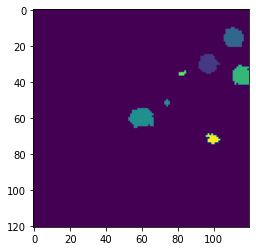

test_segmented_41223590028271667_step1.fits


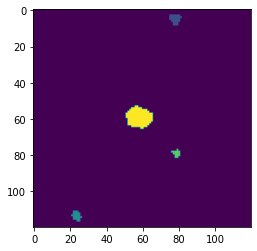

test_segmented_43738856020777708_step1.fits


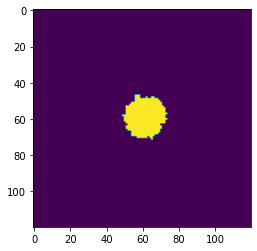

test_segmented_42292452769434872_step1.fits


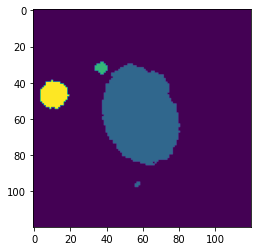

test_segmented_43163119949709671_step1.fits


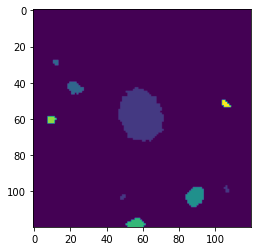

test_segmented_40682767746334768_step1.fits


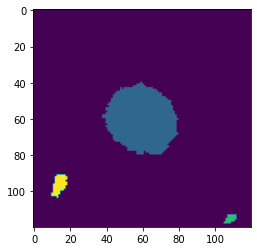

test_segmented_74648739217681671_step1.fits


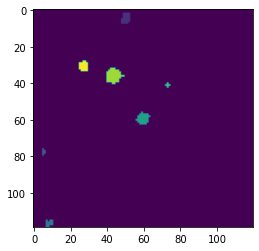

test_segmented_42691983512203787_step1.fits


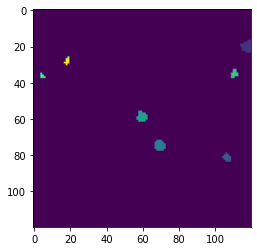

test_segmented_43708211429145872_step1.fits


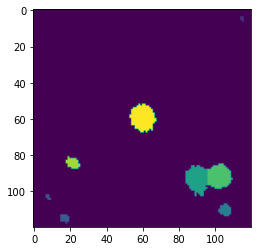

test_segmented_74648614663620896_step1.fits


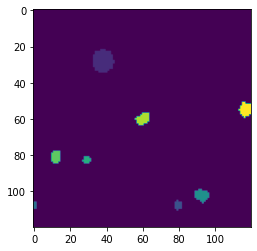

test_segmented_41117895178094438_step1.fits


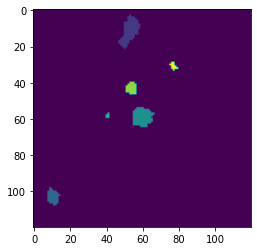

test_segmented_43153645251857452_step1.fits


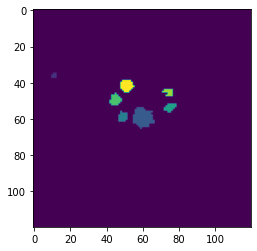

test_segmented_43255337192547744_step1.fits


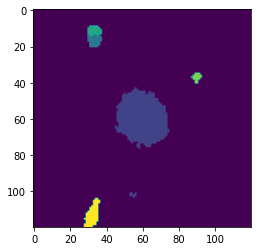

test_segmented_41654877759235768_step1.fits


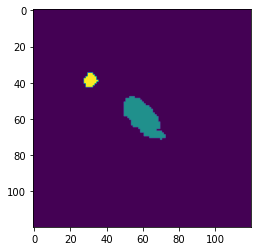

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt

for filename in os.listdir(directory)[:50]:
    if filename.startswith("test_segmented"):
        file_path = os.path.join(directory, filename)
        print(filename)
        img = fits.getdata(file_path)
        plt.figure()
        plt.imshow(img)
        plt.show()

<ipython-input-4-49693252ac00>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (segmented_ax, original_ax) = plt.subplots(1, 2)


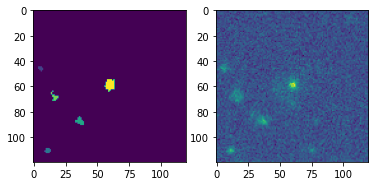

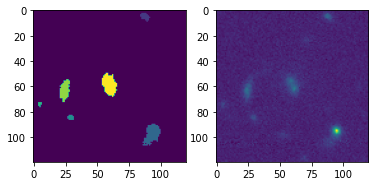

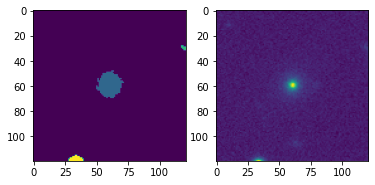

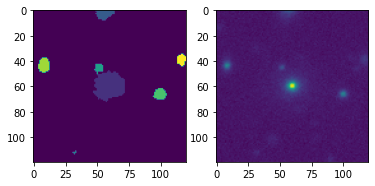

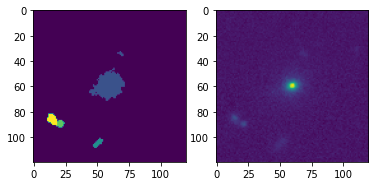

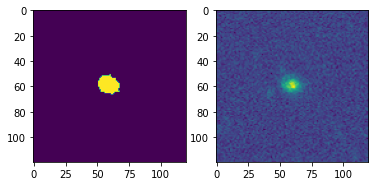

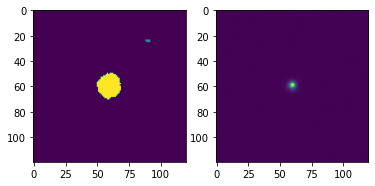

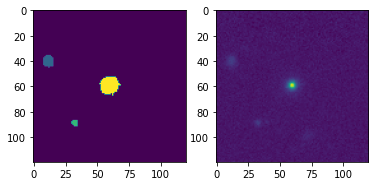

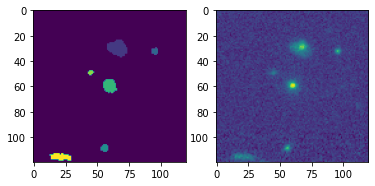

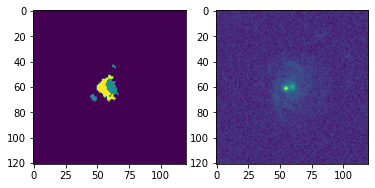

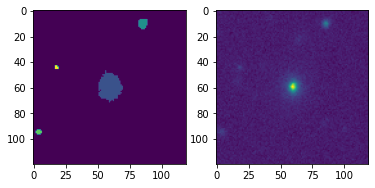

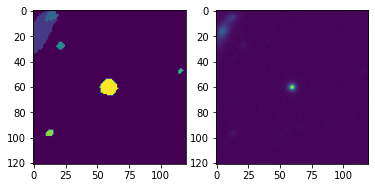

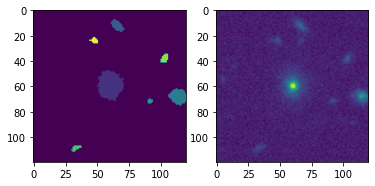

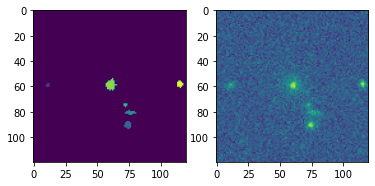

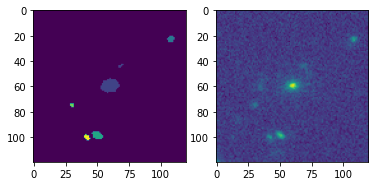

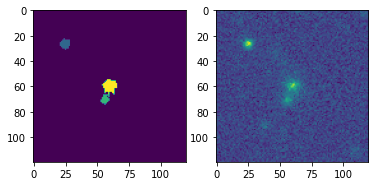

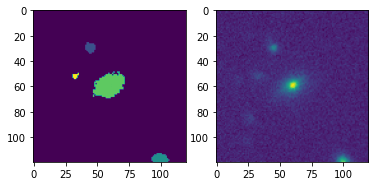

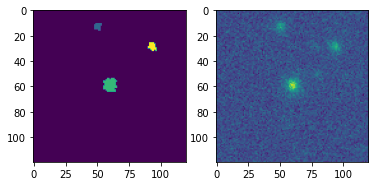

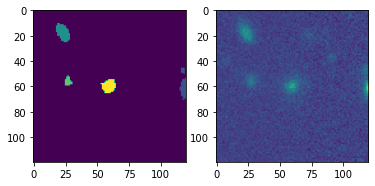

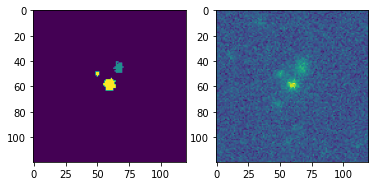

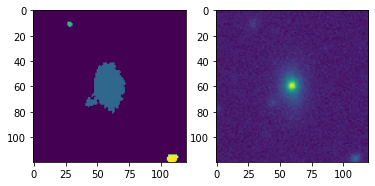

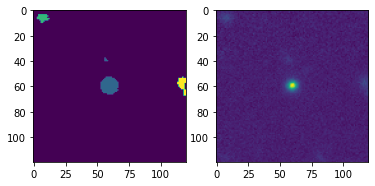

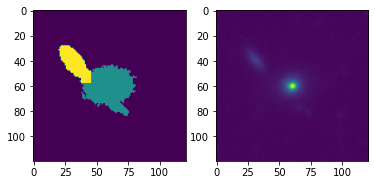

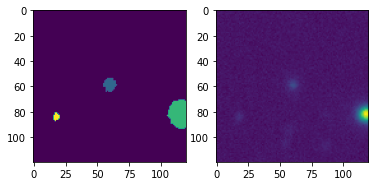

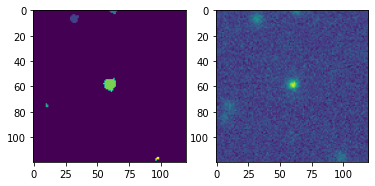

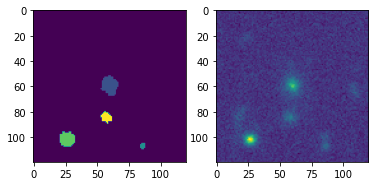

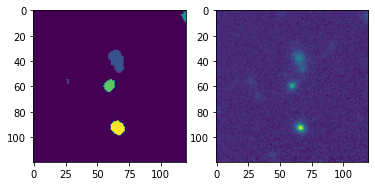

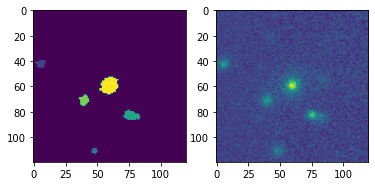

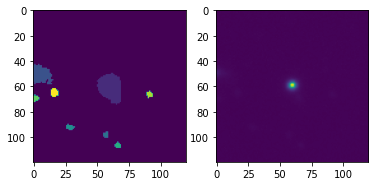

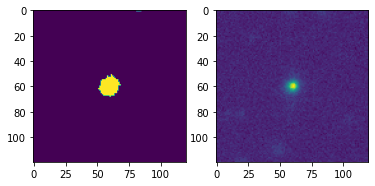

In [4]:
for object_id in obj_ids[:30]:
    segmented_filepath = f'{directory}/test_segmented_{object_id}_step1.fits'
    original_filepath = f'{directory}/{object_id}_step1.fits'
    segmented_img = fits.getdata(segmented_filepath)
    original_img = fits.getdata(original_filepath)
    fig, (segmented_ax, original_ax) = plt.subplots(1, 2)
    segmented_ax.imshow(segmented_img)
    original_ax.imshow(original_img)

In [5]:
# must clear prevous segmented and cat files if you want to make a new batch

In [6]:
# detailed galaxies might be seen as multiple galaxies, as we need to consider the separation between galaxies
# it might be hard to keep track of

# run num_in_center script on segmented files and match magnitudes by object id to the df

# plot magnitude vs petro rad 
# also make histograms when the df is full

In [7]:
df.to_csv(f'/data/HSC/HSC_v6/step1/g_band_sextractor/{window}_10k_subset/segmented_image_data_v1.csv', index=False)